# Visualizing Training Logs - Overall Evaluation Metrics
 
During model training, logs are generated in the `work_dirs` directory. These logs contain information about loss functions, evaluation metrics, etc., which can be parsed and visualized.

## View evaluation metrics for a category IoU Acc Dice Fscore Precision Recall

In [1]:
import os
os.chdir('mmsegmentation')

In [2]:
os.getcwd()

'/home/featurize/work/CFA/mmsegmentation'

## Import Toolkit

In [3]:
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

## Load the training log

In [4]:
# Log file path
log_path = './work_dirs/ZihaoDataset-FastSCNN/20250408_125427/vis_data/scalars.json'

In [5]:
with open(log_path, "r") as f:
    json_list = f.readlines()

In [6]:
len(json_list)

361

In [7]:
eval(json_list[4])

{'lr': 0.11973086417099389,
 'data_time': 0.13593549728393556,
 'loss': 0.3639903634786606,
 'decode.loss_ce': 0.19791180044412612,
 'decode.acc_seg': 66.41645812988281,
 'aux_0.loss_ce': 0.08082505650818347,
 'aux_0.acc_seg': 64.27841186523438,
 'aux_1.loss_ce': 0.08525350615382195,
 'aux_1.acc_seg': 55.36842346191406,
 'time': 0.20282127857208251,
 'iter': 400,
 'memory': 1452,
 'step': 400}

In [8]:
df_train = pd.DataFrame()
df_test = pd.DataFrame()
for each in json_list[:-1]:
    if 'aAcc' in each:
        df_test = df_test.append(eval(each), ignore_index=True)
    else:
        df_train = df_train.append(eval(each), ignore_index=True)

In [9]:
df_train

,lr,data_time,loss,decode.loss_ce,decode.acc_seg,aux_0.loss_ce,aux_0.acc_seg,aux_1.loss_ce,aux_1.acc_seg,time,iter,memory,step
0,0.119991,0.113273,0.502625,0.270915,33.625698,0.116186,33.631802,0.115524,40.557194,0.180889,15.0,3668.0,15.0
1,0.119933,0.137478,0.392048,0.219717,67.609695,0.087695,70.800781,0.084636,73.654083,0.205394,100.0,1452.0,100.0
2,0.119866,0.172242,0.363653,0.200029,63.482380,0.081222,66.876602,0.082403,58.831978,0.240268,200.0,1452.0,200.0
3,0.119798,0.110050,0.350567,0.192394,44.353676,0.077279,44.818306,0.080893,40.996075,0.178012,300.0,1452.0,300.0
4,0.119731,0.135935,0.363990,0.197912,66.416458,0.080825,64.278412,0.085254,55.368423,0.202821,400.0,1452.0,400.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,0.099839,0.180259,0.133471,0.043764,96.600914,0.020268,95.386314,0.069439,72.152328,0.248501,29600.0,1452.0,29600.0
297,0.099770,0.122482,0.145674,0.051077,94.367691,0.021490,94.459625,0.073106,53.775597,0.188470,29700.0,1452.0,29700.0
298,0.099701,0.089488,0.123844,0.037471,91.644096,0.016765,91.066170,0.069608,65.648460,0.156168,29800.0,1452.0,29800.0
299,0.099632,0.117073,0.141570,0.046689,88.424774,0.021539,86.053848,0.073342,55.570984,0.184489,29900.0,1452.0,29900.0


In [10]:
df_test

,aAcc,mIoU,mAcc,mDice,mFscore,mPrecision,mRecall,data_time,time,step
0,78.30,47.35,57.32,61.10,61.10,77.43,57.32,0.030785,0.420117,500.0
1,79.73,52.99,63.65,67.83,67.83,74.75,63.65,0.043021,0.066352,1000.0
2,83.31,62.94,76.34,76.00,76.00,78.56,76.34,0.066349,0.084870,1500.0
3,80.69,55.79,68.95,70.20,70.20,72.19,68.95,0.066320,0.083685,2000.0
4,77.82,51.76,68.42,65.88,65.88,77.60,68.42,0.066346,0.085037,2500.0
5,84.52,63.60,76.08,76.46,76.46,81.00,76.08,0.067715,0.085249,3000.0
6,83.56,64.88,78.76,78.07,78.07,78.65,78.76,0.073506,0.090971,3500.0
7,85.92,67.21,78.44,79.40,79.40,82.95,78.44,0.073003,0.091456,4000.0
8,85.62,68.57,77.23,80.70,80.70,86.57,77.23,0.070827,0.088217,4500.0
9,78.46,58.41,78.55,71.73,71.73,73.42,78.55,0.073628,0.090169,5000.0


## Export training log form

In [11]:
df_train.to_csv('charts/FastSCNN-TrainingLog-TrainSet.csv', index=False)
df_test.to_csv('charts/FastSCNN-TrainingLog-TestSet.csv', index=False)

## Visualization helper functions

In [12]:
from matplotlib import colors as mcolors
import random
random.seed(124)
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan', 'black', 'indianred', 'brown', 'firebrick', 'maroon', 'darkred', 'red', 'sienna', 'chocolate', 'yellow', 'olivedrab', 'yellowgreen', 'darkolivegreen', 'forestgreen', 'limegreen', 'darkgreen', 'green', 'lime', 'seagreen', 'mediumseagreen', 'darkslategray', 'darkslategrey', 'teal', 'darkcyan', 'dodgerblue', 'navy', 'darkblue', 'mediumblue', 'blue', 'slateblue', 'darkslateblue', 'mediumslateblue', 'mediumpurple', 'rebeccapurple', 'blueviolet', 'indigo', 'darkorchid', 'darkviolet', 'mediumorchid', 'purple', 'darkmagenta', 'fuchsia', 'magenta', 'orchid', 'mediumvioletred', 'deeppink', 'hotpink']
markers = [".",",","o","v","^","<",">","1","2","3","4","8","s","p","P","*","h","H","+","x","X","D","d","|","_",0,1,2,3,4,5,6,7,8,9,10,11]
linestyle = ['--', '-.', '-']

def get_line_arg():
    '''
    # Randomly generate a plot line style
    '''
    line_arg = {}
    line_arg['color'] = random.choice(colors)
    # line_arg['marker'] = random.choice(markers)
    line_arg['linestyle'] = random.choice(linestyle)
    line_arg['linewidth'] = random.randint(1, 4)
    # line_arg['markersize'] = random.randint(3, 5)
    return line_arg

## Training set loss function

In [13]:
metrics = ['loss', 'decode.loss_ce', 'aux.loss_ce']

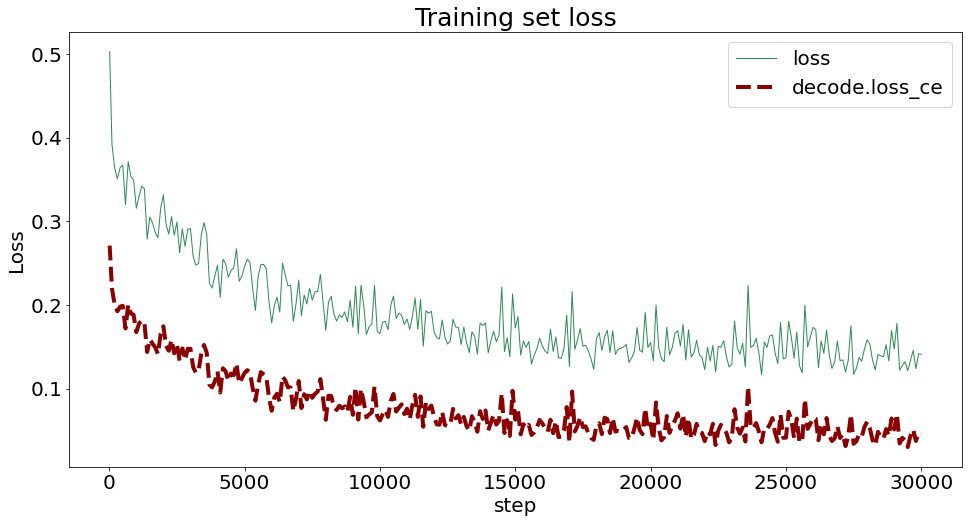

In [14]:
plt.figure(figsize=(16, 8))

x = df_train['step']
for y in metrics:
    try:
        plt.plot(x, df_train[y], label=y, **get_line_arg())
    except:
        pass

plt.tick_params(labelsize=20)
plt.xlabel('step', fontsize=20)
plt.ylabel('Loss', fontsize=20)
plt.title('Training set loss', fontsize=25)

plt.legend(fontsize=20)

plt.savefig('charts/FastSCNN-Training_Loss_Function.pdf', dpi=120, bbox_inches='tight')

plt.show()

## Training set accuracy

In [15]:
metrics = ['decode.acc_seg', 'aux.acc_seg']

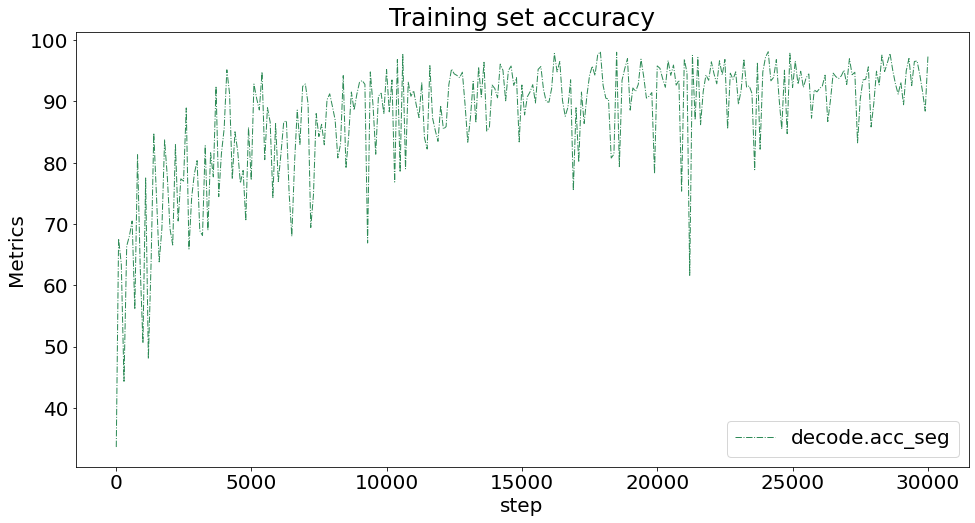

In [16]:
plt.figure(figsize=(16, 8))

x = df_train['step']
for y in metrics:
    try:
        plt.plot(x, df_train[y], label=y, **get_line_arg())
    except:
        pass

plt.tick_params(labelsize=20)
plt.xlabel('step', fontsize=20)
plt.ylabel('Metrics', fontsize=20)
plt.title('Training set accuracy', fontsize=25)

plt.legend(fontsize=20)
plt.savefig('charts/FastSCNN-Training_Set_Accuracy.pdf', dpi=120, bbox_inches='tight')

plt.show()

## Test set evaluation metrics

In [17]:
df_test.columns

Index(['aAcc', 'mIoU', 'mAcc', 'mDice', 'mFscore', 'mPrecision', 'mRecall',
       'data_time', 'time', 'step'],
      dtype='object')

In [18]:
metrics = ['aAcc', 'mIoU', 'mAcc', 'mDice', 'mFscore', 'mPrecision', 'mRecall']

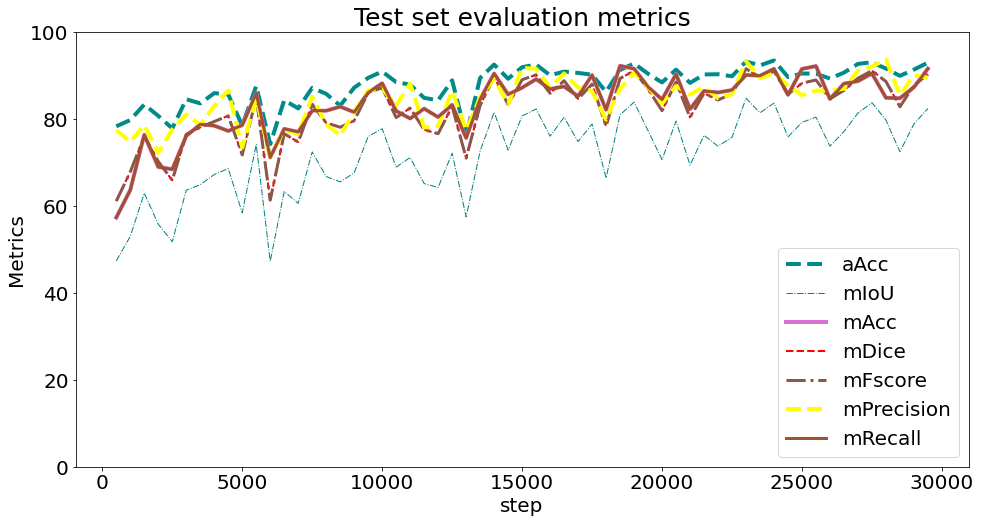

In [19]:
plt.figure(figsize=(16, 8))

x = df_test['step']
for y in metrics:
    try:
        plt.plot(x, df_test[y], label=y, **get_line_arg())
    except:
        pass

plt.tick_params(labelsize=20)
plt.ylim([0, 100])
plt.xlabel('step', fontsize=20)
plt.ylabel('Metrics', fontsize=20)
plt.title('Test set evaluation metrics', fontsize=25)

plt.legend(fontsize=20)

plt.savefig('charts/FastSCNN-Test_Set_Evaluation_Metrics.pdf', dpi=120, bbox_inches='tight')

plt.show()